## Data exploration

The following code blocks are shared to ensure reproducability of the results reported to a research paper that has been submitted to EC3-2022 conference (https://ec-3.org/conference2022/) 

In [1]:
import pandas as pd
import rdflib

In [2]:
g = rdflib.Graph()
g.parse("Data/02_BIMcollab_Example_STR.ttl", format="ttl")

<Graph identifier=N043083cff24a46789fd59e70bfdbfd5e (<class 'rdflib.graph.Graph'>)>

In [3]:
# limiting query results to 10
q_findBeam = g.query("SELECT ?s WHERE { ?s rdf:type  ifcowl:IfcBeam .} LIMIT 10") 
for row in q_findBeam:
    print(f"Found beam elements:  {row.s}")

Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12503
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12542
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12587
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12636
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12675
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12714
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12753
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12791
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12830
Found beam elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12869


In [4]:
# limiting query results to 10

q_findWall = g.query("SELECT ?s WHERE { ?s rdf:type  ifcowl:IfcBeam .} LIMIT 10")
for row in q_findWall:
    print(f"Found wall elements:  {row.s}")

Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12503
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12542
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12587
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12636
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12675
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12714
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12753
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12791
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12830
Found wall elements:  http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcBeam_12869


In [5]:
q_wall_description = """
SELECT ?p ?o 
WHERE { 
    inst:IfcWallStandardCase_16840 ?p ?o .
}"""
q_res = g.query(q_wall_description)
print("<{}> sets of descriptions found:".format(len(q_res)))
for row in q_res:
        print("""
        [predicte]: {}
        [object]: {}       
        """.format(row.p, row.o))

<8> sets of descriptions found:

        [predicte]: http://www.w3.org/1999/02/22-rdf-syntax-ns#type
        [object]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#IfcWallStandardCase       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#globalId_IfcRoot
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcGloballyUniqueId_11337       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#ownerHistory_IfcRoot
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcOwnerHistory_41       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#name_IfcRoot
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcLabel_10772       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#objectType_IfcObject
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcLabel_1077

In [6]:
q_beam_description = """
SELECT ?p ?o 
WHERE { 
    inst:IfcBeam_12791 ?p ?o .
}"""

q_res = g.query(q_beam_description)
print("<{}> sets of descriptions found:".format(len(q_res)))
for row in q_res:
        print("""
        [predicte]: {}
        [object]: {}       
        """.format(row.p, row.o)) 

<8> sets of descriptions found:

        [predicte]: http://www.w3.org/1999/02/22-rdf-syntax-ns#type
        [object]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#IfcBeam       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#globalId_IfcRoot
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcGloballyUniqueId_20756       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#ownerHistory_IfcRoot
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcOwnerHistory_41       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#name_IfcRoot
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcLabel_20757       
        

        [predicte]: http://www.buildingsmart-tech.org/ifcOWL/IFC2X3_TC1#objectType_IfcObject
        [object]: http://linkedbuildingdata.net/ifc/resources20170901_130950/IfcLabel_20758       
   

## Semantic embedding learning

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.samplers import WideSampler
from pyrdf2vec.walkers import HALKWalker
from pyrdf2vec.walkers import RandomWalker

In [8]:
# create DataFrame from beam and wall entities 
df = pd.read_csv("Data/isarc2021/isarc_data.csv")

In [9]:
entities = [entity for entity in df["object"]]

RANDOM_STATE = 22


embeddings, literals = RDF2VecTransformer(
    Word2Vec(workers=1, epochs=10),
    walkers=[
        HALKWalker(
            2,
            None,
            n_jobs=2,
            sampler=WideSampler(),
            random_state=RANDOM_STATE,
            md5_bytes=None,
        )
    ],
    verbose=1,
).fit_transform(
    KG("Data/02_BIMcollab_Example_STR.owl",
       skip_predicates={
            'http://www.w3.org/1999/02/22/-rdf-syntax-ns#type'
        }
    ),
    entities
)

print("Leanring done")

100%|████████████████████████████████████████| 205/205 [00:01<00:00, 114.92it/s]


Extracted 5535 walks for 205 entities (1.9933s)
Fitted 5535 walks (0.2143s)
Leanring done


## Data visulization

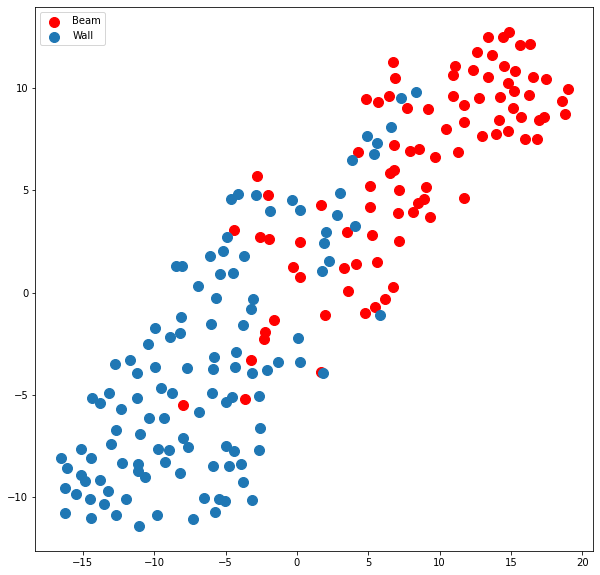

In [10]:
# 2D visualization of the learned embeddings using t-SNE algorithm
walk_tsne = TSNE(random_state=42)
X_tsne = walk_tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 10))

plt.scatter(X_tsne[0:90, 0], X_tsne[0:90, 1], s=100, c="r", label='Beam')
plt.scatter(X_tsne[91:, 0], X_tsne[91:, 1], s=100, label='Wall')
plt.legend()
plt.show()